In [19]:
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as n
%matplotlib notebook

In [20]:
m2micron = 1e6       #[microns/meters]
c = 2.99792458e8     #[m/s]

def convert_Jy_to_F_lam(wave_arr, flux_arr):
    
    #flux_arr input array in jansky
    #wave_arr input array in microns
    
    wave_arr_meters = wave_arr/m2micron        #meters
    flux_arr *= 1e-26           #[W/m^2/Hz]
    flux_arr *= c/(wave_arr_meters**2) #[W/m^2/m]
    flux_arr /= m2micron        #[W/m^2/microns] 
    
    return flux_arr

reading in files and getting the flux and error info

In [21]:
#you can change the x1d file directory
data = fits.getdata('reduction_1_10_2/nirspec_vhs1256b_reduction/reduce_all_NIRSPEC_data/stage3/dithers_g140h-f100lp-g235h-f170lp-g395h-f290lp_x1d.fits')
wavelength = data['wavelength']
flux  = data['flux']
flux_err = data['flux_error']
snr = flux/flux_err
flux_flam = convert_Jy_to_F_lam(wavelength , flux)

/var/folders/1s/nd774lkj1234c0k9rq5n8gn40000gn/T/ipykernel_15723/4162056726.py:5: RuntimeWarning: invalid value encountered in divide
  snr = flux/flux_err


<IPython.core.display.Javascript object>


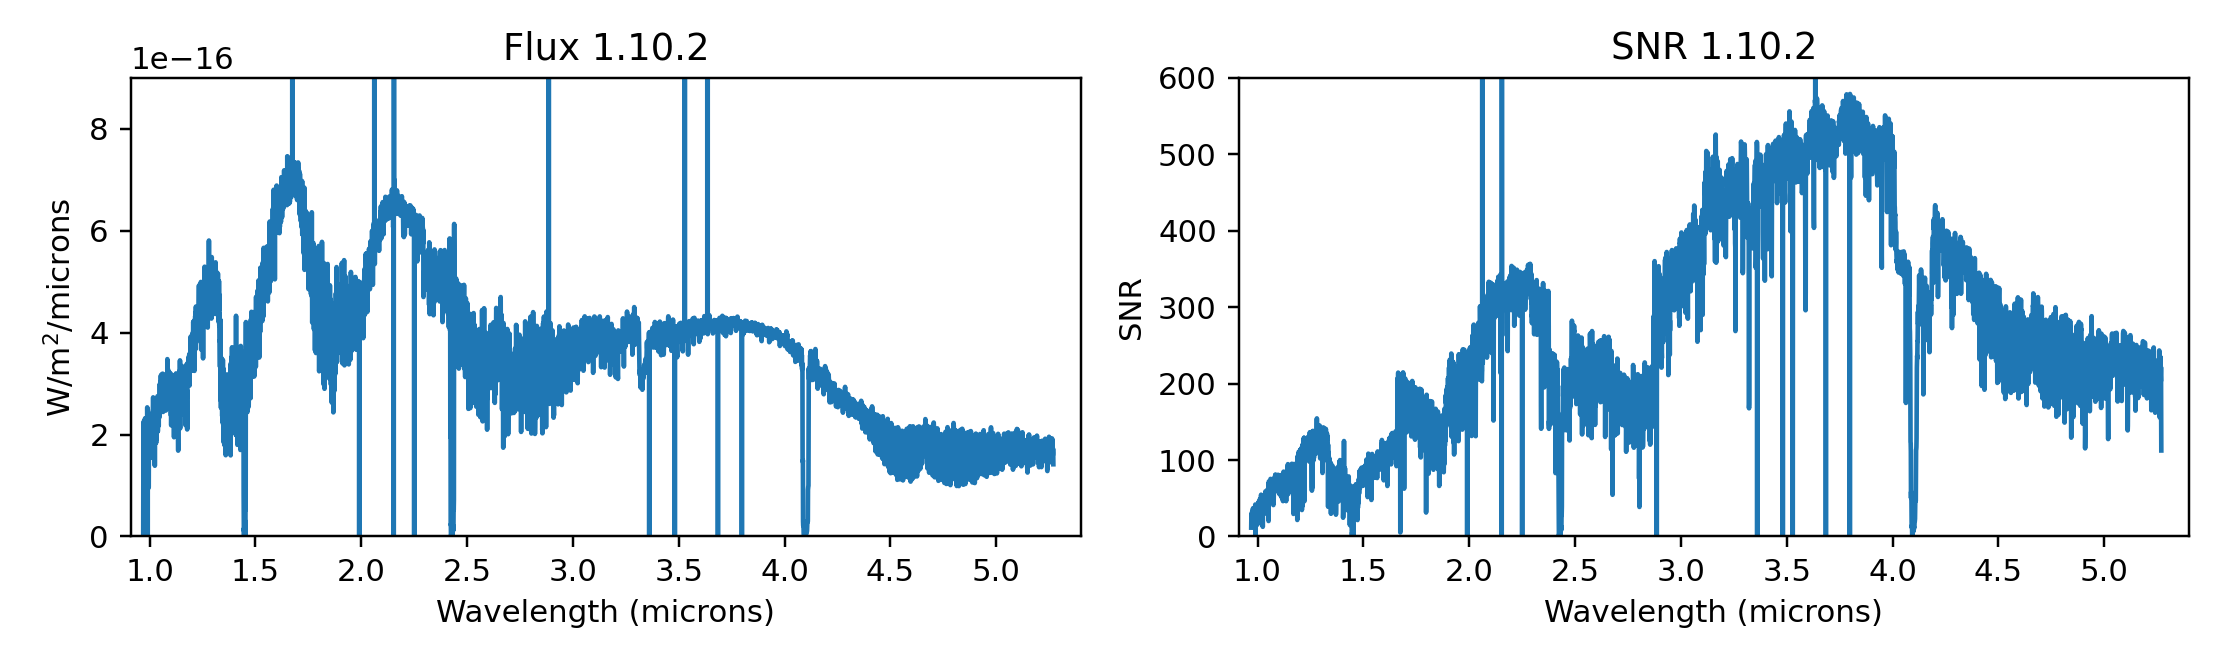

In [22]:
plt.figure('1.10.2', figsize = (10, 3))
plt.subplot(121)
plt.title('Flux 1.10.2')
plt.plot(wavelength, flux_flam)
plt.ylim([0, 9e-16])
plt.xlim([.910, 5.4])
plt.ylabel('W/m$^2$/microns')
plt.xlabel('Wavelength (microns)')

plt.subplot(122)
plt.title('SNR 1.10.2')
plt.plot(wavelength, snr)
plt.ylim([0, 600])
plt.xlim([.910, 5.4])
plt.ylabel('SNR')
plt.xlabel('Wavelength (microns)')
plt.show()
plt.tight_layout()

clipping hot pixels or high values. 

In [23]:
#clip
#these high and low values are relevant for this data set
flux_clip_min = 9.4e-17
flux_clip_max = 7.5e-16

bad = n.where( (flux_flam > flux_clip_max) | (flux_flam < flux_clip_min))
flux_flam[bad] = n.nan

bad2 = n.where( (wavelength > 2.42) & (wavelength < 2.43796) )
flux_flam[bad2] = n.nan

bad3 = n.where( (wavelength > 4.083) & (wavelength < 4.114) )
flux_flam[bad3] = n.nan

<IPython.core.display.Javascript object>


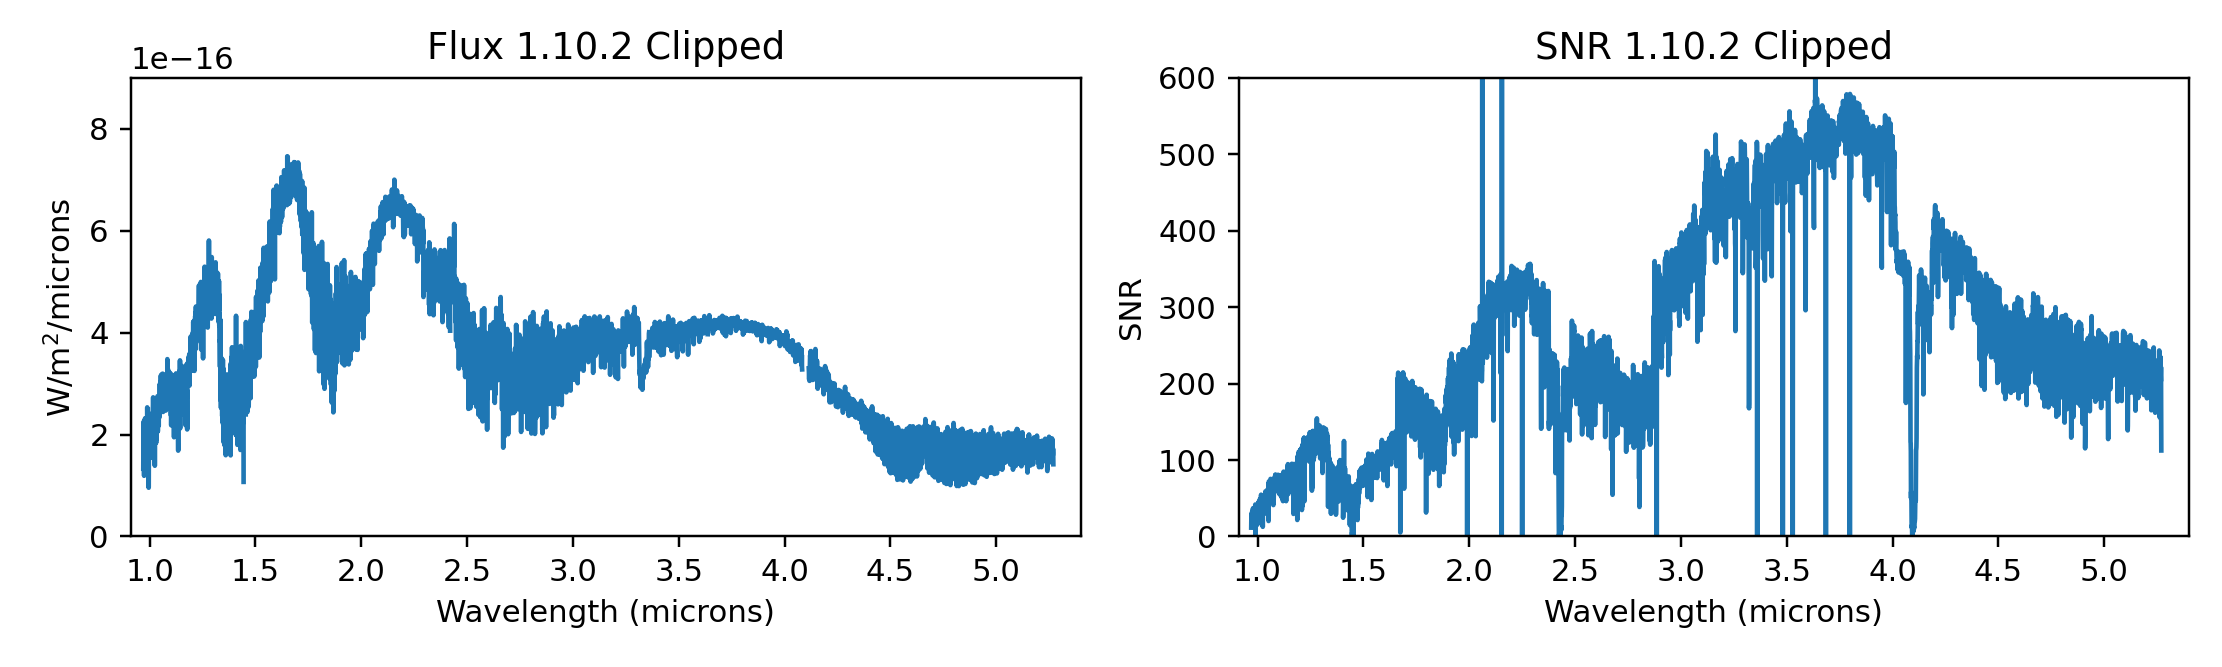

In [25]:
plt.figure('1.10.2 Clipped', figsize = (10, 3))
plt.subplot(121)
plt.title('Flux 1.10.2 Clipped')
plt.plot(wavelength, flux_flam)
plt.ylim([0, 9e-16])
plt.xlim([.910, 5.4])
plt.ylabel('W/m$^2$/microns')
plt.xlabel('Wavelength (microns)')

plt.subplot(122)
plt.title('SNR 1.10.2 Clipped')
plt.plot(wavelength, snr)
plt.ylim([0, 600])
plt.xlim([.910, 5.4])
plt.ylabel('SNR')
plt.xlabel('Wavelength (microns)')
plt.show()
plt.tight_layout()